## importações

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from sklearn import svm

from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models
from tensorflow.keras import layers

import tensorflow as tf

%matplotlib inline

In [26]:
def print_confusion_matrix(trueY, predictY):
    cm = confusion_matrix(trueY, predictY)
    total = sum(sum(cm))
    acc = (cm[0, 0] + cm[1, 1]) / total
    
    print("Acurácia: {:.4f}".format(acc))
    
    fig, ax = plot_confusion_matrix(conf_mat = cm, figsize=(5,5))
    plt.show()

In [27]:
df = pd.read_csv("faces.csv")
df = df.drop('Unnamed: 0', axis = 1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,target
0,0.624656,-0.447745,0.624376,0.168215,-1.183529,1.161336,1.180575,-1.458736,0.925821,0.236734,...,-1.062742,0.596569,0.682379,0.292868,0.409854,1.634237,0.249691,-0.189478,-1.783221,glauciane
1,0.921183,-0.228285,1.023043,-0.362588,-0.759581,0.905878,1.626263,-1.420151,1.193603,0.791741,...,-1.375485,0.683259,0.827911,-0.167854,0.260004,1.484647,0.228390,-0.471342,-1.681182,glauciane
2,-0.037906,-0.927606,0.960223,0.052220,-1.199638,0.768999,1.396971,-0.688852,0.781067,0.692422,...,-1.764692,0.959367,0.720395,-0.322032,0.306745,1.598800,-0.141811,-0.795695,-1.841082,glauciane
3,0.677615,-0.018155,0.723042,-0.119465,-1.317164,1.009346,1.103884,-1.569089,0.324309,0.405659,...,-0.621289,0.506900,0.757364,0.247419,0.131484,1.497606,0.284347,-0.406723,-2.066759,glauciane
4,0.841432,-0.305600,0.955496,-0.508191,-0.417205,1.673414,0.809553,-1.041964,1.069607,0.473020,...,-0.451649,0.114553,0.892378,0.363496,0.414226,2.106771,-0.339435,-0.562916,-2.133557,glauciane


In [28]:
X = np.array(df.drop("target", axis = 1))
y = np.array(df.target)

## Misturando e Separando os Dados

In [29]:
trainX, testX, trainY, testY = train_test_split(X, y,test_size=0.33, random_state = 0)

In [30]:
out_encoder = LabelEncoder()
out_encoder.fit(trainY)

LabelEncoder()

In [31]:
trainY = out_encoder.transform(trainY)
trainY

array([0, 0, 0, ..., 0, 0, 0])

## KNN


In [32]:
knn = KNN(n_neighbors = 5)
knn.fit(trainX, trainY)

In [34]:
yhat_train = knn.predict(trainX)
yhat_test = knn.predict(testX)
yhat_test

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
out_encoder = LabelEncoder()
out_encoder.fit(trainY)

LabelEncoder()

In [36]:
trainY = out_encoder.transform(trainY)
out_encoder.fit(testY)
testY = np.array(out_encoder.transform(testY))

Acurácia: 0.9918


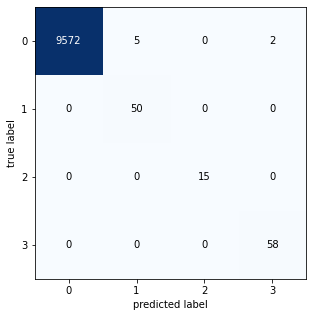

In [38]:
print_confusion_matrix(testY, yhat_test)

## SVM

In [39]:
svm = svm.SVC()
svm.fit(trainX, trainY)

In [41]:
yhat_train = svm.predict(trainX)
yhat_test = svm.predict(testX)
yhat_test

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

Acurácia: 0.9925


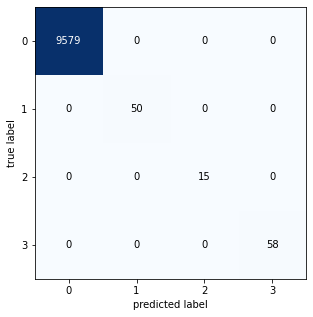

In [42]:
print_confusion_matrix(testY, yhat_test)

## Rede Neural

In [43]:
trainY = to_categorical(trainY)

In [49]:
n_classes = len(df.target.unique())

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(64, activation = 'relu', input_shape = (128,)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(n_classes, activation = 'softmax'))
        
model.compile(optimizer="adam", loss= "categorical_crossentropy", metrics=['accuracy'])
model.fit(trainX, trainY, epochs=20, batch_size = 8)

Epoch 1/20
19697/19697 [==============================] - 1s 59us/sample - loss: 0.0709 - acc: 0.9785
Epoch 2/20
19697/19697 [==============================] - 1s 58us/sample - loss: 0.0087 - acc: 0.9968
Epoch 3/20
19697/19697 [==============================] - 1s 57us/sample - loss: 0.0056 - acc: 0.9979
Epoch 4/20
19697/19697 [==============================] - 1s 57us/sample - loss: 0.0046 - acc: 0.9983
Epoch 5/20
19697/19697 [==============================] - 1s 57us/sample - loss: 0.0031 - acc: 0.9988
Epoch 6/20
19697/19697 [==============================] - 1s 57us/sample - loss: 0.0028 - acc: 0.9987
Epoch 7/20
19697/19697 [==============================] - 1s 57us/sample - loss: 0.0034 - acc: 0.9987
Epoch 8/20
19697/19697 [==============================] - 1s 57us/sample - loss: 0.0031 - acc: 0.9985
Epoch 9/20
19697/19697 [==============================] - 1s 57us/sample - loss: 0.0030 - acc: 0.9987
Epoch 10/20
19697/19697 [==============================] - 1s 57us/sample - loss: 

In [50]:
yhat_train = model.predict(trainX)
yhat_test = model.predict(testX)
yhat_test = np.argmax(yhat_test, axis = 1)

Acurácia: 0.9925


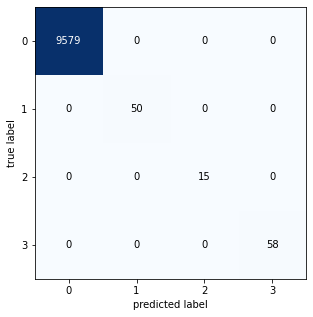

In [52]:
print_confusion_matrix(testY, yhat_test)